# 1. Carga de bibliotetas

Seccion para instalar e importar bibliotecas necesarias

In [22]:
# Acá instalamos la biblioteca fitter para el ajuste de funciones
!pip install fitter

In [23]:
# Acá importarmos todas las bibliotecas necesarias: Pandas, Numpy, Scipy y Fitter
from fitter import Fitter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [24]:
# Esto se hace para montar el gogle drive y poder acceder datos alojados allí.
# from google.colab import drive
# drive.mount('/content/drive')

# 2. Carga de datos

Utilizaremos los datos de recorrido de bicicletas públicas de la ciudad de Buenos Aires
https://data.buenosaires.gob.ar/dataset/bicicletas-publicas

Bajaremos el archivo "Recorridos Realizados 2023 (ZIP)", descomprimiremos el archivo csv presente ("trips_2023.csv")y lo alojamos dentro de la carpeta "Colab Notebooks" de nuestro Google Drive




In [25]:
# En esta parte del código se debe modificar la ubicación correcta del google drive
# bicis = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EPIO/Datos/trips_2023.csv')
productos = pd.read_csv('./Fecom_Inc_Products.csv', sep=';')

# 3. Análisis Exploratorio de Datos

In [26]:
# Corroboramos que el tipo de dato de la variable "bicis" es un dataframe
type(productos)

pandas.core.frame.DataFrame

In [27]:
# Primeras lineas de nuestro dataframe
productos.head()

,Product_ID,Product_Category_Name,Product_Weight_Gr,Product_Length_Cm,Product_Height_Cm,Product_Width_Cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,Baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,Housewares,625.0,20.0,17.0,13.0


In [28]:
# Si solo quiero los nombres de las columnas en formato lista
productos.columns

Index(['Product_ID', 'Product_Category_Name', 'Product_Weight_Gr',
       'Product_Length_Cm', 'Product_Height_Cm', 'Product_Width_Cm'],
      dtype='object')

In [29]:
# Dimensionalidad del dataframe
productos.shape

(32951, 6)

In [30]:
# El tipo de dato de cada una de las columnas
# Acá veo que 'duracion_recorrido', 'fecha_origen_recorrido' y 'fecha_destino_recorrido'
# son de tipo object (texto) y no está bueno eso
productos.dtypes

Product_ID                object
Product_Category_Name     object
Product_Weight_Gr        float64
Product_Length_Cm        float64
Product_Height_Cm        float64
Product_Width_Cm         float64
dtype: object

In [31]:
# Para acceder a una columna específica puedo usar el operador punto:
productos.Product_Width_Cm

0        14.0
1        20.0
2        15.0
3        26.0
4        13.0
         ... 
32946    40.0
32947    16.0
32948    27.0
32949    20.0
32950     7.0
Name: Product_Width_Cm, Length: 32951, dtype: float64

In [32]:
# O el operador corchete:
productos['Product_Width_Cm']

0        14.0
1        20.0
2        15.0
3        26.0
4        13.0
         ... 
32946    40.0
32947    16.0
32948    27.0
32949    20.0
32950     7.0
Name: Product_Width_Cm, Length: 32951, dtype: float64

# 5. Cálculo de FDPS

In [33]:
# En una variable preparar la columna del df que quiero ajustar
# fdp_constitucion_hora = Fitter(productos.Product_Width_Cm)
# Filtrar a algunas distribuciones típicas (cambiá esta lista según lo que necesites)
# fdp_constitucion_hora = Fitter(productos['Product_Width_Cm'],
        #    distributions=['norm', 'expon', 'gamma', 'lognorm', 'uniform'])
fdp_constitucion_hora = Fitter(productos['Product_Height_Cm'].dropna().values)  # segundos
# fdp_constitucion_hora.fit()
# fdp_constitucion_hora.summary()


In [34]:
# Con el método fit() ajusta mis datos a las 80 distribuciones de SciPy
fdp_constitucion_hora.fit()

2025-04-30 04:29:28.855 | WARNING  | fitter.fitter:_fit_single_distribution:337 - SKIPPED _fit distribution (taking more than 30 seconds)
2025-04-30 04:29:28.926 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted alpha distribution with error=0.016397)
2025-04-30 04:29:28.960 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted anglit distribution with error=0.026128)
2025-04-30 04:29:29.130 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted arcsine distribution with error=0.02381)
2025-04-30 04:29:29.360 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted bradford distribution with error=0.010984)
2025-04-30 04:29:29.452 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=0.010185)
2025-04-30 04:29:29.776 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted chi distribution with error=0.007045)
2025-04-30 04:29:29.850 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fi

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
kappa3,0.006009,1264.560216,1289.768365,inf,0.060821,2.140812e-106
rel_breitwigner,0.006153,1291.834661,1317.042810,inf,0.057291,1.912684e-94
burr,0.006156,1387.901571,1421.512436,inf,0.110686,0.000000e+00
halflogistic,0.006205,1334.697507,1351.502940,inf,0.063979,1.073541e-117
mielke,0.006219,1255.832526,1289.443390,inf,0.101974,9.603125e-299
ncf,0.006283,1224.149924,1266.163505,inf,0.101487,6.756811e-296
genexpon,0.006284,1299.787683,1341.801264,inf,0.063861,2.905072e-117
genhalflogistic,0.006290,1314.661183,1339.869331,inf,0.077795,6.920483e-174
burr12,0.006561,1277.643802,1311.254666,inf,0.076933,4.648831e-170
foldcauchy,0.006626,1183.308174,1208.516322,inf,0.062136,4.942881e-111


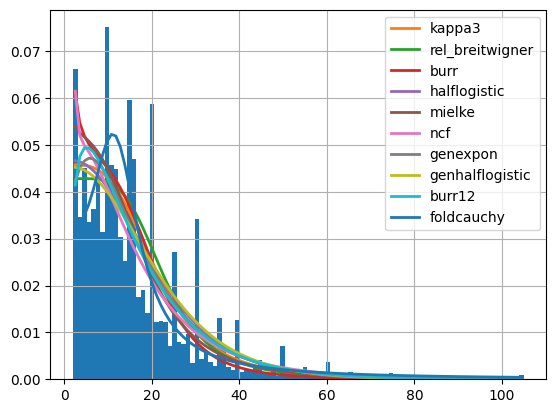

In [35]:
# Summary me muestra el resumen de los mejores ajustes
fdp_constitucion_hora.summary(10)

# 6. Simulacion

In [36]:
# get_best me devuelve la mejor distribución de acuerdo al criterio que le indico y sus parámetros
fdp_constitucion_hora.get_best(method='sumsquare_error')

{'kappa3': {'a': 2.9822833513253957,
  'loc': 1.999999998627227,
  'scale': 15.155271423211087}}

In [37]:
fdp_constitucion_hora.get_best(method='ks_statistic')

{'fisk': {'c': 2.3184590230603397,
  'loc': -0.28515922151568746,
  'scale': 13.40184052191875}}

In [38]:
# Para simular, guardo los valores de los parámetros en 4 variables
dfn = 10.210149046195188
dfd = 24.449261873976212
loc = -0.210629715477468
scale =  15.900756775955681

In [39]:
# Gracias al método rvs del módulo stats de Scipy, puedo generar datos
# con los parámetros que me dio Fitter
fdp_f = stats.f.rvs(dfn, dfd, loc=loc, scale=scale, size=35000)

In [40]:
# Esta variable es un array de Numpy con valores similares a mis datos de origen
fdp_f

array([22.27406215, 17.37614748, 10.09498598, ..., 36.28481935,
       44.22828299, 24.82309087])

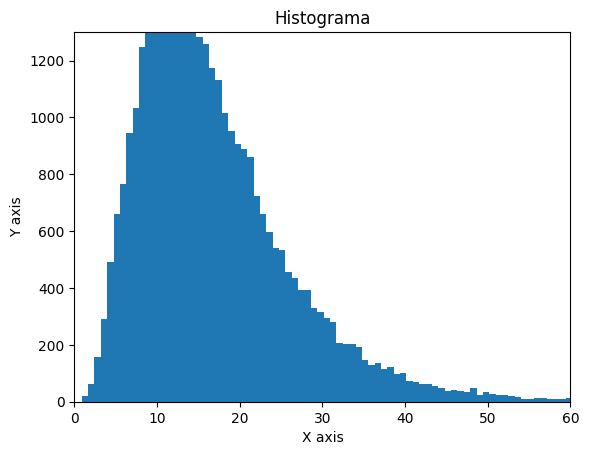

In [41]:
# Histograma de datos de verificación
plt.title("Histograma")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.xlim(0, 60)
plt.ylim(0, 1300)
plt.hist(fdp_f, bins=150)
plt.show()